# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached https://files.pythonhosted.org/packages/25/72/da7c69a3542071bf1e8f65336721b8b2659194425438d988f79bc14ed9cc/opencv-python-4.9.0.80.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached https://files.pythonhosted.org/packages/de/44/bf1b0eef5b13e6201aef076ff34b91bc40aace8591cd273c1c2a94a9cc00/keras-2.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/99/fb/8354f56519f318aca100a7390a52ef90d7bd1031e31b42fa0a68992afd69/grpcio-1.62.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ec/6b/63cc3

  ERROR: Complete output from command 'C:\Users\manth\Anaconda3\python.exe' -u -c 'import setuptools, tokenize;__file__='"'"'C:\\Users\\manth\\AppData\\Local\\Temp\\pip-install-rtpkxnvb\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\manth\AppData\Local\Temp\pip-wheel-ssrhdohp' --python-tag cp37:
  ERROR: Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\manth\AppData\Local\Temp\pip-install-rtpkxnvb\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  ----

In [2]:
!pip list

Package                            Version  
---------------------------------- ---------
absl-py                            2.1.0    
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         0.24.0   
astroid                            2.2.5    
astropy                            3.2.1    
astunparse                         1.6.3    
atomicwrites                       1.3.0    
attrs                              19.1.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.7.1    
bitarray                           0.9.3    
bkcharts  

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
!pip install opencv-python

In [8]:
import cv2
import imghdr

In [15]:
data_dir = 'data'

In [16]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list data\happy\vector.svg
Image not in ext list data\happy\vector10.svg
Image not in ext list data\happy\vector11.svg
Image not in ext list data\happy\vector12.svg
Image not in ext list data\happy\vector2.svg
Image not in ext list data\happy\vector3.svg
Image not in ext list data\happy\vector4.svg
Image not in ext list data\happy\vector5.svg
Image not in ext list data\happy\vector6.svg
Image not in ext list data\happy\vector7.svg
Image not in ext list data\happy\vector8.svg
Image not in ext list data\happy\vector9.svg
Image not in ext list data\sad\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data\sad\article-2029228-01C3E98B000004B0-620_233x423.jpg
Image not in ext list d

# 3. Load Data

In [21]:
tf.data.Dataset??

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 278 files belonging to 2 classes.


In [58]:
data_iterator = data.as_numpy_iterator()

In [59]:
# Get another batch from the iterator
batch = data_iterator.next()

In [60]:
# Class 1 = Sad People
# Class 0 = Happy People
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

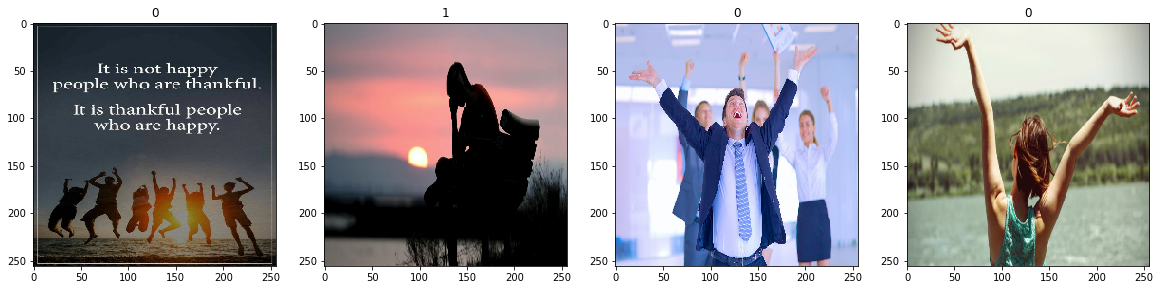

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [62]:
scaled = batch[0] / 255

In [63]:
scaled.max()

1.0

# 4. Scale Data

In [64]:
data = data.map(lambda x,y: (x/255, y))

In [65]:
scaled_iterator = data.as_numpy_iterator()

In [68]:
batch = scaled_iterator.next()

In [69]:
batch[0].max()

1.0

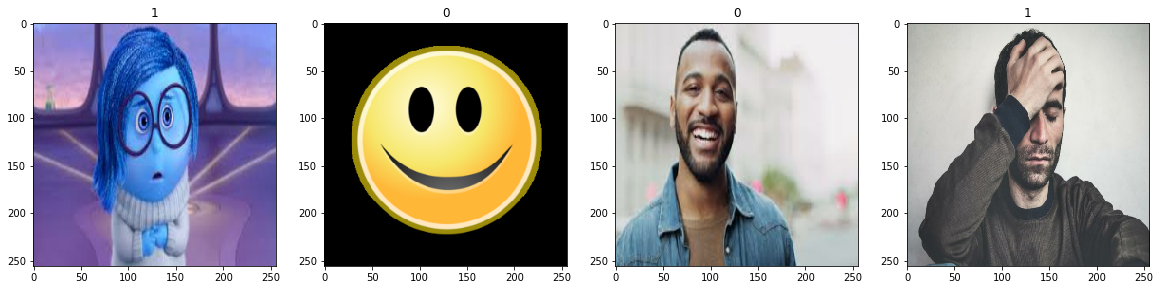

In [70]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [79]:
len(data)

9

In [80]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [81]:
train_size + val_size + test_size

9

In [82]:
train_size

6

In [83]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
len(test)

1

# 6. Build Deep Learning Model

In [85]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [87]:
model = Sequential()

In [88]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [91]:
logdir='logs'

In [92]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [93]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 7s 953ms/step - loss: 0.8736 - accuracy: 0.5521 - val_loss: 0.6152 - val_accuracy: 0.6094
Epoch 2/20
6/6 [==============================] - 6s 884ms/step - loss: 0.6436 - accuracy: 0.5729 - val_loss: 0.6180 - val_accuracy: 0.8125
Epoch 3/20
6/6 [==============================] - 6s 985ms/step - loss: 0.6160 - accuracy: 0.7708 - val_loss: 0.5651 - val_accuracy: 0.9375
Epoch 4/20
6/6 [==============================] - 7s 1s/step - loss: 0.5373 - accuracy: 0.8646 - val_loss: 0.4636 - val_accuracy: 0.8281
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 0.3831 - accuracy: 0.8542 - val_loss: 0.2637 - val_accuracy: 0.9219
Epoch 6/20
6/6 [==============================] - 6s 859ms/step - loss: 0.2725 - accuracy: 0.8906 - val_loss: 0.2177 - val_accuracy: 0.9375
Epoch 7/20
6/6 [==============================] - 6s 862ms/step - loss: 0.1933 - accuracy: 0.9479 - val_loss: 0.1498 - val_accuracy: 0.9375
Epoch 8/20
6/6 [==========

# 8. Plot Performance

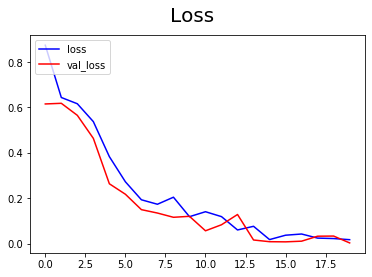

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

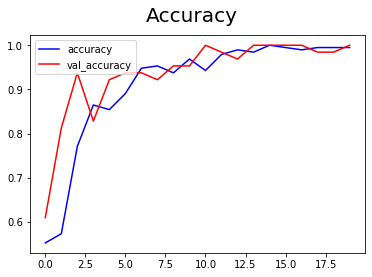

In [96]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 188ms/step


In [102]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [103]:
import cv2

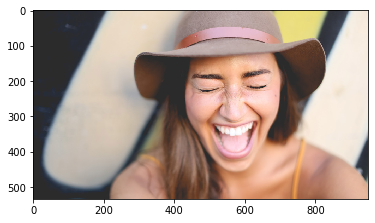

In [106]:
img = cv2.imread('happyTest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

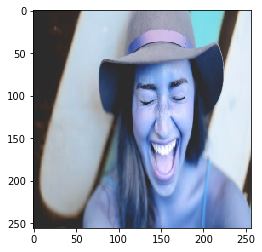

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [112]:
yhat

array([[0.47094035]], dtype=float32)

In [113]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [114]:
from tensorflow.keras.models import load_model

In [115]:
model.save(os.path.join('models','imageclassifier.h5'))

In [116]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [119]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [120]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
